# Networkx - Calculation of Network Metrics

In [1]:
import networkx as nx
import pandas as pd

#pip install --upgrade distinctiveness
from distinctiveness.dc import dc_all

import random
random.seed(14)

Generate directed and undirected random graphs, both weigthed.

{(1, 5): Text(0.9452365660085267, 0.3173968095566424, '1'),
 (1, 2): Text(0.36899816811554365, 0.1737568357642161, '9'),
 (2, 1): Text(0.36899816811554365, 0.1737568357642161, '10'),
 (2, 6): Text(-0.4812110865447435, -0.2635038660080855, '8'),
 (2, 3): Text(-0.30837853588751213, 0.10757356427966931, '3'),
 (2, 4): Text(-0.30812373936223714, -0.11758174547277829, '4'),
 (3, 4): Text(-0.46402547946378314, -0.053892943548556865, '4'),
 (4, 3): Text(-0.46402547946378314, -0.053892943548556865, '4')}

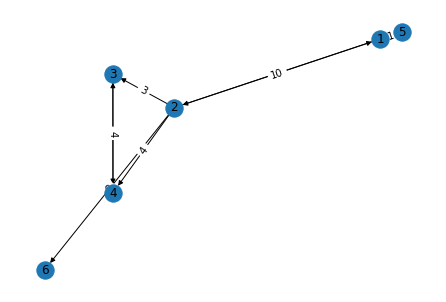

In [2]:
#Directed
D= nx.DiGraph()
D.add_edge(1,5, weight = 5)
D.add_edge(1,2, weight = 6)
D.add_edge(2,1, weight = 2)
D.add_edge(2,6, weight = 5)
D.add_edge(2,3, weight = 2)
D.add_edge(2,4, weight = 2)
D.add_edge(3,4, weight = 3)
D.add_edge(4,3, weight = 5)

#Add Random Weights
for (u, v) in D.edges():
    D.edges[u,v]['weight'] = random.randint(0,10)
    
#Draw
pos = nx.kamada_kawai_layout(D)
nx.draw(D, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(D,'weight')
nx.draw_networkx_edge_labels(D,pos,edge_labels=labels)

{(1, 5): Text(0.76892866004707, 0.6598902773958536, '1'),
 (1, 2): Text(0.2586734160491036, 0.22627640492204154, '10'),
 (2, 6): Text(-0.5883159925795983, 0.08515309524225194, '7'),
 (2, 3): Text(-0.37340251570980637, -0.330280411306973, '4'),
 (2, 4): Text(-0.015514539422445989, -0.5852370386688674, '7'),
 (3, 4): Text(-0.18061266746747162, -0.7450433726381056, '10')}

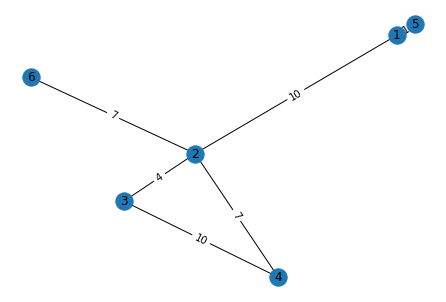

In [3]:
#Undirected
G= nx.Graph()
G.add_edge(1,5, weight = 5)
G.add_edge(1,2, weight = 2)
G.add_edge(2,6, weight = 5)
G.add_edge(2,3, weight = 2)
G.add_edge(2,4, weight = 2)
G.add_edge(3,4, weight = 5)

#Add Random Weights
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.randint(0,10)
    
#Draw
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

### Degree and Weighted Degree

In [4]:
#ALL DEGREE
alldeg = dict(G.degree(G, weight = None))
weialldeg = dict(G.degree(G, weight = "weight"))
pd.DataFrame.from_dict([alldeg, weialldeg]).rename(index={0:'AllDeg', 1:'WeiAllDeg'}).T.sort_index()

,AllDeg,WeiAllDeg
1,2,11
2,4,28
3,2,14
4,2,17
5,1,1
6,1,7


Can also be normalized.

In [5]:
#Normalize Degree
n = G.number_of_nodes()
alldeg = {k:v/(n-1) for k,v in dict(G.degree(G, weight = None)).items()}
alldeg

{1: 0.4, 5: 0.2, 2: 0.8, 6: 0.2, 3: 0.4, 4: 0.4}

In [6]:
#ON THE DIRECTED GRAPH
indeg = dict(D.in_degree(G, weight = None))
outdeg = dict(D.out_degree(G, weight = None))
weiindeg = dict(D.in_degree(G, weight = "weight"))
weioutdeg = dict(D.out_degree(G, weight = "weight"))

pd.DataFrame.from_dict([indeg, outdeg, weiindeg, weioutdeg]).rename(index={0:'InDeg',
                                                                           1:'OutDeg', 2:"WeiInDeg",
                                                                           3:"WeiOutDeg", 4:"AllDeg"}).T

,InDeg,OutDeg,WeiInDeg,WeiOutDeg
1,1,2,10,10
5,1,0,1,0
2,1,4,9,25
6,1,0,8,0
3,2,1,7,4
4,2,1,8,4


### Distinctiveness
Calculate Distinctiveness Centrality on **weighted** directed and undirected graphs.

In [7]:
#Calculate on Undirected Graph and Visualize ad PD DataFrame
DC = dc_all(G, alpha = 1.5, normalize = False)
pd.DataFrame(DC).sort_index().dropna(axis=1, how='all')

,D1,D2,D3,D4,D5
1,-1.342230,0.494850,0.870309,5.124891,1.125000
2,10.088715,1.441245,24.890779,20.086522,2.060660
3,1.657770,0.043305,1.998033,6.723924,0.478553
4,1.045410,0.043305,5.102348,9.672014,0.478553
5,0.247425,0.247425,0.077544,0.030653,0.353553
6,-1.428840,-0.204120,-1.265873,1.691055,0.125000


In [8]:
#Calculate on Directed Graph and Visualize ad PD DataFrame
DC = dc_all(D, alpha = 1.5, normalize = False)
pd.DataFrame(DC).sort_index().dropna(axis=1, how='all')

,D1_in,D2_in,D3_in,D4_in,D5_in,D1_out,D2_out,D3_out,D4_out,D5_out
1,-2.041200,-0.204120,0.673426,4.688583,0.125000,6.989700,1.397940,16.334685,10.000000,2.000000
2,2.226825,0.247425,11.991946,8.678571,0.353553,14.313435,1.892790,34.157014,21.181288,2.707107
3,2.183520,0.494850,6.031094,4.231124,1.125000,0.989700,0.247425,2.716904,2.000000,0.353553
4,1.979400,0.494850,5.942267,4.474451,1.125000,0.989700,0.247425,3.365385,2.424949,0.353553
5,0.247425,0.247425,0.186310,0.035714,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000
6,-1.632960,-0.204120,-0.220612,2.683901,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000


### Closeness, Betweenness and Eigenvector Centrality
Some metrics consider the arc weights as distances, in order to calculate the shortest paths. In case weights are not distances but a signal of a stronger relationship, one solution is to invert them.

In [9]:
#Define inverse weights
for u,v,d in G.edges(data=True):
    if 'weight' in d and d['weight'] != 0:
        d['inverse'] = 1/d['weight']
    else:
        d['weight'] = 1
        d['inverse'] = 1
        
for u,v,d in D.edges(data=True):
    if 'weight' in d and d['weight'] != 0:
        d['inverse'] = 1/d['weight']
    else:
        d['weight'] = 1
        d['inverse'] = 1
        
print(G.edges.data(), "\n\n", D.edges.data())

[(1, 5, {'weight': 1, 'inverse': 1.0}), (1, 2, {'weight': 10, 'inverse': 0.1}), (2, 6, {'weight': 7, 'inverse': 0.14285714285714285}), (2, 3, {'weight': 4, 'inverse': 0.25}), (2, 4, {'weight': 7, 'inverse': 0.14285714285714285}), (3, 4, {'weight': 10, 'inverse': 0.1})] 

 [(1, 5, {'weight': 1, 'inverse': 1.0}), (1, 2, {'weight': 9, 'inverse': 0.1111111111111111}), (2, 1, {'weight': 10, 'inverse': 0.1}), (2, 6, {'weight': 8, 'inverse': 0.125}), (2, 3, {'weight': 3, 'inverse': 0.3333333333333333}), (2, 4, {'weight': 4, 'inverse': 0.25}), (3, 4, {'weight': 4, 'inverse': 0.25}), (4, 3, {'weight': 4, 'inverse': 0.25})]


Now we can calculate the metrics.

In [10]:
#Undirected Graph, considering arc weights
wei_eigen = nx.eigenvector_centrality(G, max_iter=100, weight="weight")
wei_betw = nx.betweenness_centrality(G, weight ="inverso", normalized = False)
wei_clos = nx.closeness_centrality(G, distance="inverso")

pd.DataFrame.from_dict([wei_eigen, wei_betw, wei_clos]).rename(index={0:'WeiEigen',
                                                                      1:'WeiBetw', 2:"WeiClos"}).T.sort_index()

,WeiEigen,WeiBetw,WeiClos
1,0.356420,4.0,0.625000
2,0.611649,8.0,0.833333
3,0.432298,0.0,0.555556
4,0.499712,0.0,0.555556
5,0.020699,0.0,0.416667
6,0.248652,0.0,0.500000


In [11]:
#Directed Graph, considering arc weights
wei_eigen = nx.eigenvector_centrality(D, max_iter=100, weight="weight")
wei_betw = nx.betweenness_centrality(D, weight ="inverso", normalized = False)
wei_clos = nx.closeness_centrality(D, distance="inverso")

pd.DataFrame.from_dict([wei_eigen, wei_betw, wei_clos]).rename(index={0:'WeiEigen',
                                                                      1:'WeiBetw', 2:"WeiClos"}).T.sort_index()

,WeiEigen,WeiBetw,WeiClos
1,0.551652,1.0,0.200000
2,0.523344,3.0,0.200000
3,0.314434,0.0,0.450000
4,0.353238,0.0,0.450000
5,0.058149,0.0,0.266667
6,0.441321,0.0,0.266667


### Structural Holes (Constraint and Effective Size)
Calculate Burt's constraint and effective size, considering arc weights.

In [12]:
#Undirected Graph, considering arc weights
sh_wei = nx.constraint(G, weight ="weight")
effsize_wei = nx.effective_size(G, weight ="weight")

pd.DataFrame.from_dict([sh_wei, effsize_wei]).rename(index={0:'WeiSH', 1:'WeiES'}).T.sort_index()

,WeiSH,WeiES
1,0.834711,2.000000
2,0.398035,3.607143
3,0.953552,1.300000
4,0.754890,1.600000
5,1.000000,1.000000
6,1.000000,1.000000


In [13]:
#Directed Graph, considering arc weights
sh_wei = nx.constraint(D, weight ="weight")
effsize_wei = nx.effective_size(D, weight ="weight")

pd.DataFrame.from_dict([sh_wei, effsize_wei]).rename(index={0:'WeiSH', 1:'WeiES'}).T.sort_index()

,WeiSH,WeiES
1,0.905000,2.000000
2,0.428483,3.794118
3,0.842006,1.710526
4,0.749906,1.769737
5,NaN,NaN
6,NaN,NaN
